In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:08<00:00, 191MB/s]
100% 1.06G/1.06G [00:08<00:00, 138MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile("/content/dogs-vs-cats.zip")
zip_ref.extractall("/content")
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
train_ds = keras.utils.image_dataset_from_directory(directory='/content/train',labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256))
validation_ds = keras.utils.image_dataset_from_directory(directory='/content/test',labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256))

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalization

def process(image,label):
  image = tf.cast(image/255. ,tf.float32)  #data type castin (image to float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
model = Sequential()

model.add(Conv2D(32,(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(256,(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(512,(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 76s 114ms/step - loss: 0.7962 - accuracy: 0.6129 - val_loss: 1.3564 - val_accuracy: 0.5314
Epoch 2/10
625/625 [==============================] - 68s 109ms/step - loss: 0.5479 - accuracy: 0.7203 - val_loss: 0.6943 - val_accuracy: 0.6736
Epoch 3/10
625/625 [==============================] - 72s 115ms/step - loss: 0.4306 - accuracy: 0.7976 - val_loss: 0.3859 - val_accuracy: 0.8318
Epoch 4/10
625/625 [==============================] - 69s 111ms/step - loss: 0.3147 - accuracy: 0.8617 - val_loss: 0.3544 - val_accuracy: 0.8502
Epoch 5/10
625/625 [==============================] - 68s 109ms/step - loss: 0.2236 - accuracy: 0.9089 - val_loss: 0.3229 - val_accuracy: 0.8656
Epoch 6/10
625/625 [==============================] - 71s 114ms/step - loss: 0.1712 - accuracy: 0.9283 - val_loss: 0.4512 - val_accuracy: 0.7794
Epoch 7/10
625/625 [==============================] - 69s 109ms/step - loss: 0.1333 - accuracy: 0.9477 - val_loss: 0.3767 - val_ac

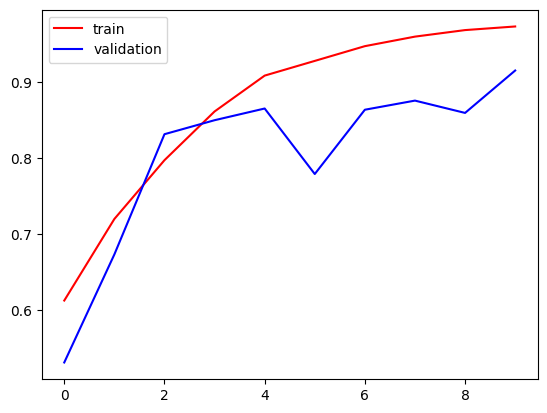

In [ ]:
# With BatchNoemalization and dropout
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='r',label='train')
plt.plot(history.history['val_accuracy'],color='b',label='validation')
plt.legend()
plt.show()

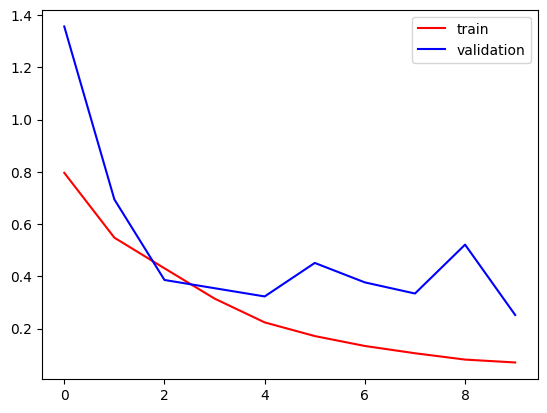

In [ ]:
# With BatchNoemalization and dropout

plt.plot(history.history['loss'],color='r',label='train')
plt.plot(history.history['val_loss'],color='b',label='validation')
plt.legend()
plt.show()

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread("/content/pexels-ihsan-adityawarman-1056252.jpg")

(-0.5, 3345.5, 5018.5, -0.5)

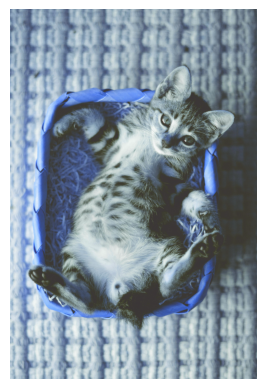

In [ ]:
plt.imshow(test_img)
plt.axis("off")

In [ ]:
test_img.shape

(5019, 3346, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
output = model.predict(test_input)
if output==0:
  print("It is a cat.")
elif output==1:
  print("It is a dog.")

1/1 [==============================] - 0s 18ms/step
It is a cat.
